<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Подготовка-данных" data-toc-modified-id="1.-Подготовка-данных-1">1. Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Осмотр-данных" data-toc-modified-id="1.1-Осмотр-данных-1.1">1.1 Осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.1.1">Промежуточный вывод</a></span></li></ul></li><li><span><a href="#1.2-Проверка-правильности-расчета-эффективности-обогащения" data-toc-modified-id="1.2-Проверка-правильности-расчета-эффективности-обогащения-1.2">1.2 Проверка правильности расчета эффективности обогащения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3">Вывод</a></span></li></ul></li><li><span><a href="#2.-Анализ-данных" data-toc-modified-id="2.-Анализ-данных-2">2. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Построение-распределения-концентраций-металов-на-выходе-каждого-процесса-и-в-хвостах" data-toc-modified-id="2.1-Построение-распределения-концентраций-металов-на-выходе-каждого-процесса-и-в-хвостах-2.1">2.1 Построение распределения концентраций металов на выходе каждого процесса и в хвостах</a></span></li><li><span><a href="#2.2-Проверка-размера-гранул-сырья" data-toc-modified-id="2.2-Проверка-размера-гранул-сырья-2.2">2.2 Проверка размера гранул сырья</a></span></li><li><span><a href="#2.3-Расчет-суммарной-концентрации" data-toc-modified-id="2.3-Расчет-суммарной-концентрации-2.3">2.3 Расчет суммарной концентрации</a></span><ul class="toc-item"><li><span><a href="#2.3.1-Удаление-выбросов" data-toc-modified-id="2.3.1-Удаление-выбросов-2.3.1">2.3.1 Удаление выбросов</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4">Вывод</a></span></li></ul></li><li><span><a href="#3.-Модель" data-toc-modified-id="3.-Модель-3">3. Модель</a></span><ul class="toc-item"><li><span><a href="#3.1-Инициализация-pipeline" data-toc-modified-id="3.1-Инициализация-pipeline-3.1">3.1 Инициализация pipeline</a></span></li><li><span><a href="#3.2-Обучение" data-toc-modified-id="3.2-Обучение-3.2">3.2 Обучение</a></span></li><li><span><a href="#3.3-Результаты-на-тренировочной-выборке" data-toc-modified-id="3.3-Результаты-на-тренировочной-выборке-3.3">3.3 Результаты на тренировочной выборке</a></span></li><li><span><a href="#3.3-Результаты-на-тестовой-выборке." data-toc-modified-id="3.3-Результаты-на-тестовой-выборке.-3.4">3.3 Результаты на тестовой выборке.</a></span></li><li><span><a href="#3.4-Сравнение-с-константной-моделью" data-toc-modified-id="3.4-Сравнение-с-константной-моделью-3.5">3.4 Сравнение с константной моделью</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4">Общий вывод</a></span></li>

# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий, необходимо подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, таким образом она поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Задача

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.impute import KNNImputer


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
## 1. Подготовка данных

### 1.1 Осмотр данных

In [2]:
train_df = pd.read_csv('./data/gold_recovery_train_new.csv')
test_df = pd.read_csv('./data/gold_recovery_test_new.csv')
full_df = pd.read_csv('./data/gold_recovery_full_new.csv')

all_df = {
     'Full_DF': full_df,
    'Test_DF': test_df,
     'Train_DF': train_df,
}

In [3]:
def label(name):
    """
    Формат этикетки:
        -----------------
        #   Имя_Ключа   #
        -----------------
    """
    name_string = f"#   {name}   #"
    print("", "-" * len(name_string), "\n", (name_string), "\n", "-" * len(name_string))

In [4]:
def show_na(df):
    """ Ф-ция подсчета пропусков и нулевых значений """
    na_info = (df.isna() | df.isnull()).sum()
    result = (pd.concat([na_info / df.shape[0], na_info], axis=1,  keys=['percent', 'abs'])
              .sort_values('percent', ascending=False))
    
    return result

In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
for key in all_df:
    label(key)
    
    display(show_na(all_df[key]).query('abs > 0'))
    print(f'Количество дубликатов в {key}: {all_df[key].duplicated().sum()} \n')

 --------------- 
 #   Full_DF   # 
 ---------------


,percent,abs
secondary_cleaner.output.tail_sol,0.089922,1748
rougher.input.floatbank11_xanthate,0.023304,453
rougher.state.floatbank10_e_air,0.022429,436
primary_cleaner.output.concentrate_sol,0.019034,370
secondary_cleaner.state.floatbank2_a_air,0.011317,220
...,...,...
primary_cleaner.state.floatbank8_b_level,0.000051,1
primary_cleaner.state.floatbank8_a_level,0.000051,1
primary_cleaner.state.floatbank8_d_level,0.000051,1
rougher.output.tail_ag,0.000051,1


Количество дубликатов в Full_DF: 0 

 --------------- 
 #   Test_DF   # 
 ---------------


,percent,abs
rougher.input.floatbank11_xanthate,0.004726,25
rougher.input.feed_sol,0.003970,21
secondary_cleaner.state.floatbank3_a_air,0.001701,9
rougher.input.floatbank11_sulfate,0.001512,8
primary_cleaner.input.depressant,0.000945,5
rougher.input.floatbank10_sulfate,0.000945,5
primary_cleaner.input.xanthate,0.000756,4
primary_cleaner.input.sulfate,0.000756,4
rougher.input.feed_rate,0.000567,3
secondary_cleaner.state.floatbank2_a_air,0.000567,3


Количество дубликатов в Test_DF: 0 

 ---------------- 
 #   Train_DF   # 
 ----------------


,percent,abs
secondary_cleaner.output.tail_sol,0.113436,1605
rougher.state.floatbank10_e_air,0.030815,436
rougher.input.floatbank11_xanthate,0.030249,428
primary_cleaner.output.concentrate_sol,0.020213,286
secondary_cleaner.state.floatbank2_a_air,0.015337,217
...,...,...
primary_cleaner.output.tail_ag,0.000071,1
final.output.concentrate_ag,0.000071,1
rougher.calculation.sulfate_to_au_concentrate,0.000071,1
rougher.output.tail_ag,0.000071,1


Количество дубликатов в Train_DF: 0 



**Необходимо проверить какие признаки есть в трейне, но которых нет в тесте.**

In [7]:
set(train_df.columns) - set(test_df.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Промежуточный вывод

* В данных есть пропуски
* В тесте не обнаруженно признаков `output`, так как это целевые признаки.
* В тесте не обнаружены признаки `calculation` для этапа `rougher`, видимо эти данные рассчитываются позднее и не доступны во время процесса. Проверим расчет recovery в `train`:
    * Вычислим `recovery` из сырых значений, проверим сколько из них совпало с предоставленными;
    * Вычислим `MAE` для рассчитанных значений и исходых.

***
### 1.2 Проверка правильности расчета эффективности обогащения

<img src = 'https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg'>

Где:
* `C` — доля золота в концентрате после флотации/очистки;
* `F` — доля золота в сырье/концентрате до флотации/очистки;
* `T` — доля золота в отвальных хвостах после флотации/очистки.

In [8]:
def calc_recovery(C, F, T):
    """ Ф-ция расчета эффективности обогащения """
    numerator = (C * (F - T))
    denominator = (F * (C - T))
    
    recovery = numerator / denominator * 100
    
    return recovery

In [9]:
recovery = train_df.dropna().reset_index()
rougher_output_recovery = recovery['rougher.output.recovery']
rougher_output_tail_au = recovery['rougher.output.tail_au']
rougher_input_feed_au = recovery['rougher.input.feed_au']
rougher_output_concentrate_au = recovery['rougher.output.concentrate_au']

In [10]:
rec = calc_recovery(rougher_output_concentrate_au, rougher_input_feed_au,rougher_output_tail_au)
display(rec.describe(), rec.head())

count    11017.000000
mean        82.741888
std         13.590523
min         -0.000000
25%         79.997468
50%         84.847754
75%         89.635149
max        100.000000
dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

**Метрика MAE для проверки расчетного значения rougher_output_recovery и табличного**

In [11]:
MAE(rec, rougher_output_recovery)

9.82970122149377e-15

In [12]:
rec.isna().sum()

0

Пропуски в тесте не значительны.

В целом можно сказать, что значения посчитаны верно.

### Вывод

Заметим, что из 34 пропущенных признака 30 относятся к параметрам продукта и только 4 к расчетным характеристикам
* 9 пропущенных признаков этапа `final`, 8 `primary_cleaner`, 9 `rougher`, 4 `secondary_cleaner` относятся к параметрам продукта;
* 4 пропущенных признака этапа `rougher` относятся к расчетным характеристикам;
* На всех этапах отсутствует информация о хвостовых частях;
* Во всех этапах, кроме повторной очистки отсутствует информация о доле металлов;
* У финального этапа и этапа флотации отсутствуют признаки обогащения;
* Так же отсутствуют данные о некоторых реагентах на этапе флотации;

***
## 2. Анализ данных

### 2.1 Построение распределения концентраций металов на выходе каждого процесса и в хвостах

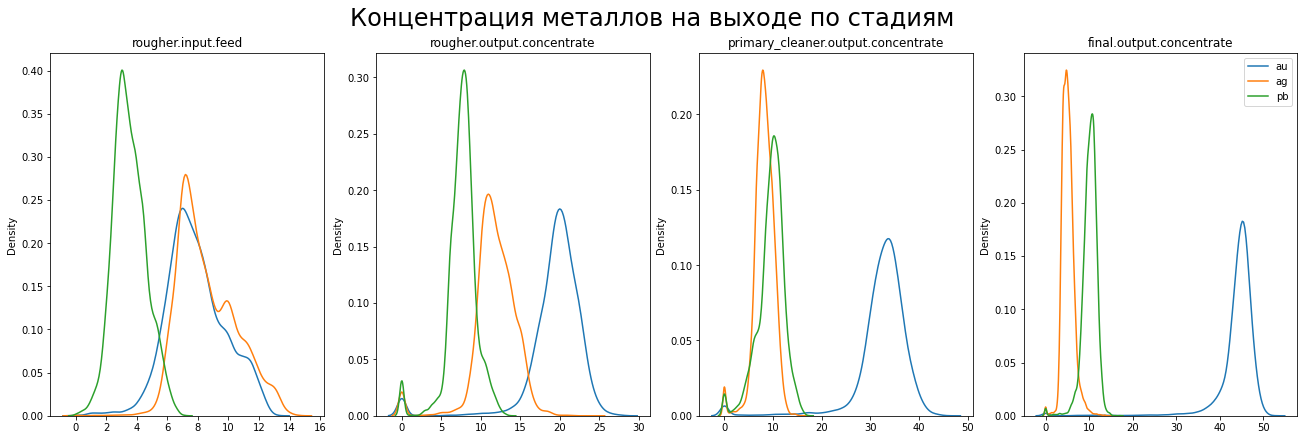

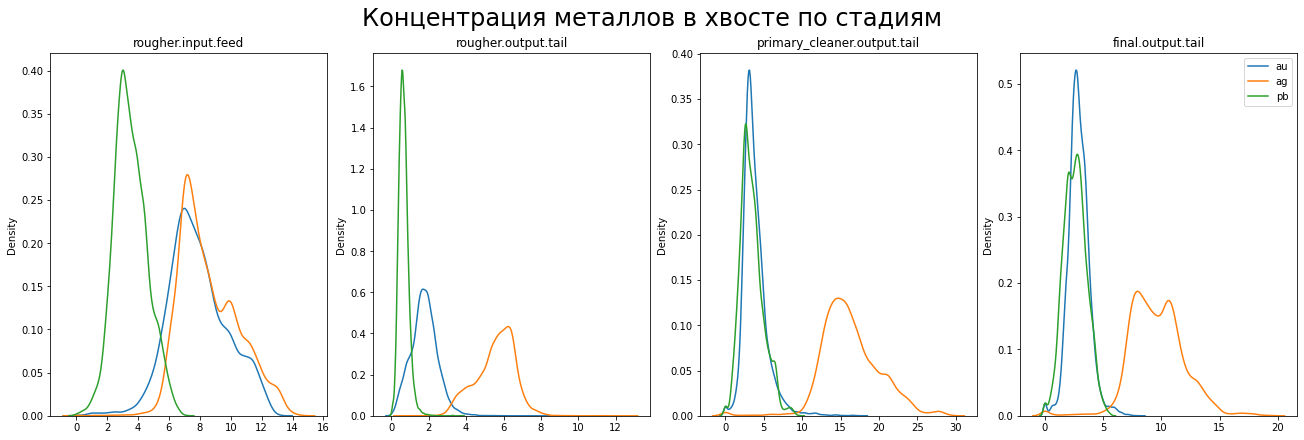

In [13]:
process = [
     'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
     'final.output.concentrate',
]

process_tail = [
     'rougher.input.feed',
    'rougher.output.tail',
    'primary_cleaner.output.tail',
     'final.output.tail',
]

metals = ['au', 'ag', 'pb']

#subplots
fig, axs = plt.subplots(1, len(process), figsize=(18, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов на выходе по стадиям', fontsize=24)

# Построение графиков концентрации металлов на выходе
for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=metal, hist=False, kde=True, ax=ax)    
plt.legend()

#subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в хвосте по стадиям', fontsize=24)

# Построение графиков концентрации металлов в хвосте
for stage, ax in zip(process_tail, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=metal, hist=False, kde=True, ax=ax)   
plt.legend()

plt.show()

Исходя из полученных данных:
* В процессе очистики концентрация золота возрастает;
* Различная концентрацию металлов в хвостовых отвалах после различных этапов.

**Дополнительно посторим графики для концентрации каждого металла на разных процессах на выходе и в хвосте**

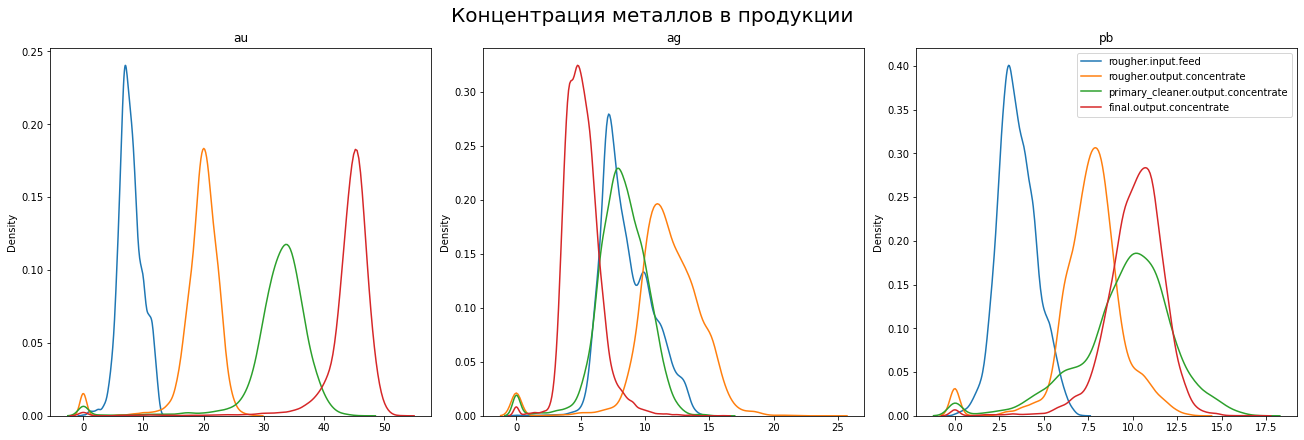

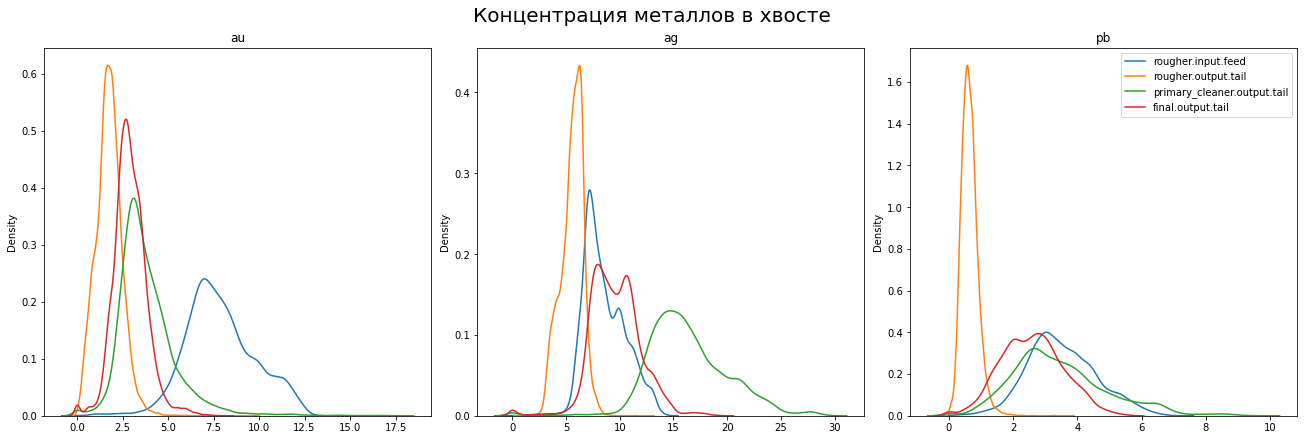

In [14]:
# subplots
fig, axs = plt.subplots(1, len(metals), figsize=(18, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в продукции', fontsize=20)

# Построение графиков концентрации металлов в продукции
for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process:
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=stage, hist=False, kde=True, ax=ax)   
plt.legend()

# subplots
fig, axs = plt.subplots(1, len(metals), figsize=(18, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в хвосте', fontsize=20)

# Построение графиков концентрации металлов в хвосте
for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process_tail:
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=stage, hist=False, kde=True, ax=ax)   
plt.legend()

plt.show()

Исходя из полученных данных:
* Концентрация золота по мере очистки значительно вырастает, так же вырастают концентрации свинца, но не так значительно;
* Можно заметить уменьшение концентрации серебра;
* Самая большая концентрация золота в хвостах после флотации, после очистки концентрация золота в хвоствх чуть меньше. Тоже самое характерно для других металлов.

***
### 2.2 Проверка размера гранул сырья

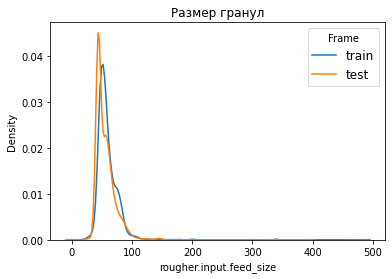

In [15]:
for frame,name in zip([train_df, test_df],
                      ["train", "test"]):
    subset = frame["rougher.input.feed_size"]
    sns.distplot(subset, hist = False, kde = True, label = name)
    
plt.legend(prop={'size': 12}, title = 'Frame')
plt.title('Размер гранул')

plt.show()

Исходя из полученных данных:
* В тренировочной выборке преобладают значения около порога ~50 и выше; 
* В тестовой выборке достаточно большое количество объектов сконцентрированы до порога ~50.

**Как мы видим распределения очень похожи, исследуем суммарную концерацию в разных процессах.**

***
### 2.3 Расчет суммарной концентрации

In [16]:
def combiner_concentrate(dictionary, df):
    """ Суммирование всех концентратов """
    result = sum([(df[dictionary[key]]) for key in dictionary])
    return result

In [17]:
def sum_cocentrate_df(df):
    """ Добавление столбцов в df с поэтапной суммой концентрата металлов """
    df['sum_before_steps'] = combiner_concentrate(rougher_input, df)
    df['sum_concentrate_rougher'] = combiner_concentrate(rougher_output, df)
    df['sum_primary_cleaner_output_concentrate'] = combiner_concentrate(primary_cleaner_output, df)
    df['sum_final_output_concentrate'] = combiner_concentrate(final_output, df)

    sum_concentrate = {
         'Before_steps': df['sum_before_steps'],
        'Rougher': df['sum_concentrate_rougher'],
        'Primary_cleaner_output': df['sum_primary_cleaner_output_concentrate'],
         'Final_output': df['sum_final_output_concentrate'],
    }
    
    return sum_concentrate

In [18]:
def concentration_graph(sum_concentrate, title):
    """ Построение графика концентрации компонентов, поэтапно """
    plt.figure(figsize=(14,8))
    vlines_size = [0.08, 0.07, 0.10, 0.17]
    colors = ['b', 'orange', 'g', 'r']

    # Суммарный концентрат металла поэтапно
    for ind, key in enumerate(sum_concentrate):
        sns.distplot(sum_concentrate[key], bins=80, hist=False, kde=True, label=key)
        plt.vlines(sum_concentrate[key].mean(), 0, vlines_size[ind], color=colors[ind])

    plt.title(title)
    plt.xlabel("Суммарный концентрат металла")
    plt.ylabel("Частота")
    plt.legend()
    plt.show()

In [19]:
# До флотации
rougher_input = {
     'feed_au': "rougher.input.feed_au", 
    'feed_ag': "rougher.input.feed_ag", 
    'feed_pb': "rougher.input.feed_pb", 
     'feed_sol': "rougher.input.feed_sol",
}

# После флотации
rougher_output = {
     'concentrate_au': 'rougher.output.concentrate_au', 
    'concentrate_ag': 'rougher.output.concentrate_ag', 
    'concentrate_pb': 'rougher.output.concentrate_pb', 
     'concentrate_sol': 'rougher.output.concentrate_sol', 
}

# После первичной очистки
primary_cleaner_output = {
     'concentrate_au': 'primary_cleaner.output.concentrate_au', 
    'concentrate_ag': 'primary_cleaner.output.concentrate_ag', 
    'concentrate_pb': 'primary_cleaner.output.concentrate_pb', 
     'concentrate_sol': 'primary_cleaner.output.concentrate_sol', 
}

# После финальной очистки
final_output = {
     'concentrate_au': 'final.output.concentrate_au', 
    'concentrate_ag': 'final.output.concentrate_ag', 
    'concentrate_pb': 'final.output.concentrate_pb', 
     'concentrate_sol': 'final.output.concentrate_sol', 
}

# Этапы
stages = [
     'sum_before_steps', 
    'sum_concentrate_rougher', 
    'sum_primary_cleaner_output_concentrate',
     'sum_final_output_concentrate',
]

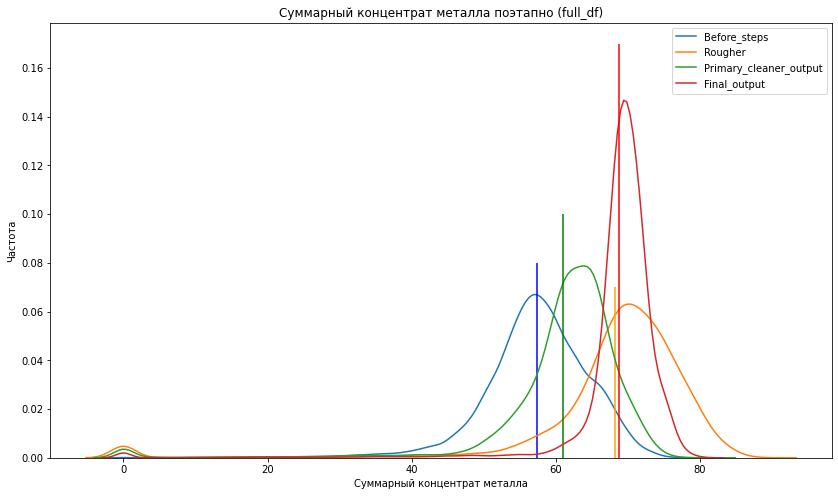

In [20]:
sum_concentrate_full = sum_cocentrate_df(full_df)
concentration_graph(sum_concentrate_full, 'Суммарный концентрат металла поэтапно (full_df)')

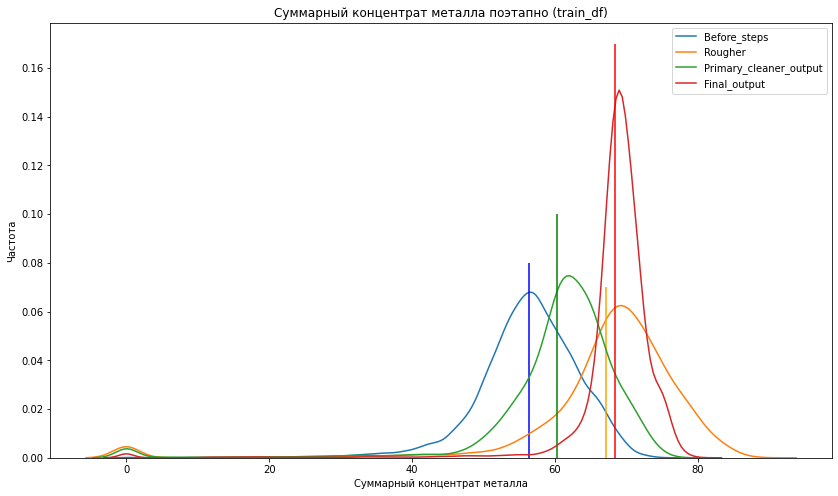

In [21]:
sum_concentrate_train = sum_cocentrate_df(train_df)
concentration_graph(sum_concentrate_train, 'Суммарный концентрат металла поэтапно (train_df)')

Исходя из полученных данных:
* Можно заметить, что во всех распределениях присутствует пик около нулевого значения.
* По распределению видно, что присутствуют выбросы. Есть много значению от 0 до 30 их очень много, а частота их нулевая.

**Мы избавимся от выбросов путем их удаления** (избавлюсь от значений ниже 5, чтобы убрать, около нулевой, пик)

***
#### 2.3.1 Удаление выбросов

In [22]:
def sum_concentrate_without_emissions(df):
    """ Удаление выбросов в копиях (использую для проверки результатов удаления выбросов) """
    df_we = df.copy()
    
    for stage in stages:
        # we == whithout_emissions
        df_we = df_we.drop(index=df_we[df_we[stage] < 5].index, axis=0)
        
    sum_concentrate_we = {
         'Before_steps': df_we['sum_before_steps'],
        'Rougher': df_we['sum_concentrate_rougher'],
        'Primary_cleaner_output': df_we['sum_primary_cleaner_output_concentrate'],
         'Final_output': df_we['sum_final_output_concentrate'],
    }
    
    return sum_concentrate_we

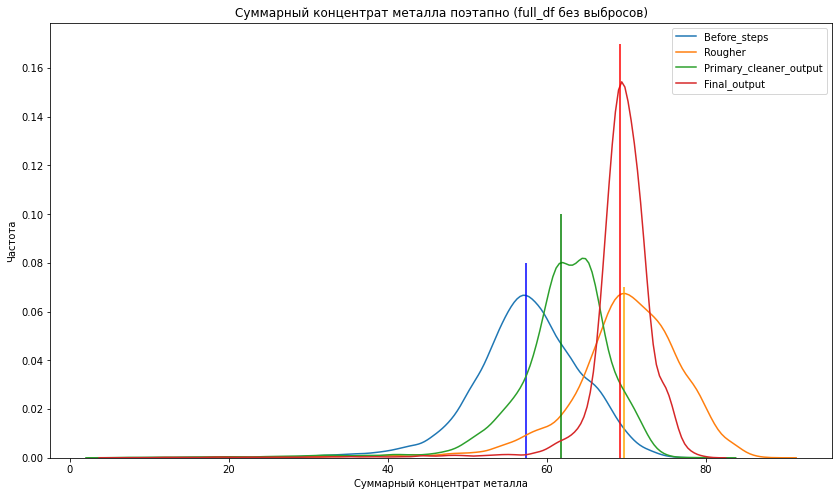

In [23]:
sum_concentrate_full_we = sum_concentrate_without_emissions(full_df)
concentration_graph(sum_concentrate_full_we, 'Суммарный концентрат металла поэтапно (full_df без выбросов)')

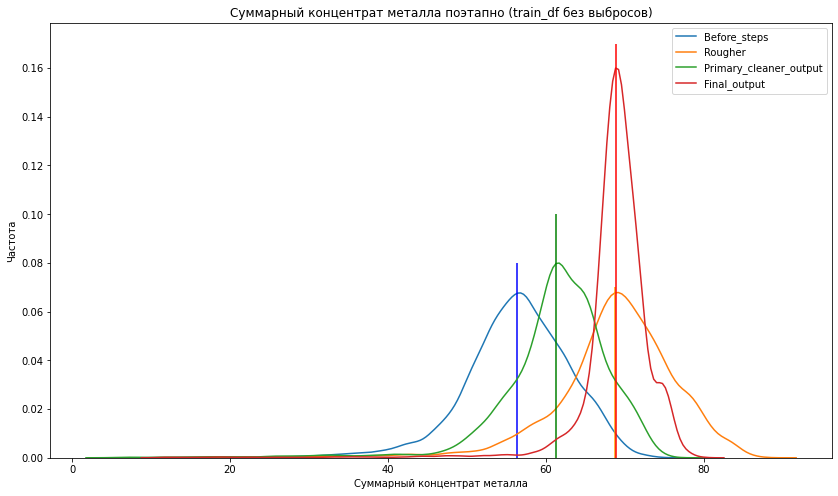

In [24]:
sum_concentrate_train_we = sum_concentrate_without_emissions(train_df)
concentration_graph(sum_concentrate_train_we, 'Суммарный концентрат металла поэтапно (train_df без выбросов)')

In [25]:
# Сделал копии, далее буду работать с ними
train_df_we, full_df_we = train_df.copy(), full_df.copy()

# Удаление выбросов
for stage in stages:
    train_df_we = train_df_we.drop(index=train_df_we[train_df_we[stage] < 30].index, axis=0)
    full_df_we = full_df_we.drop(index=full_df_we[full_df_we[stage] < 30].index, axis=0)

### Вывод

* По распределению видно, что присутствуют выбросы;
* Удаление, около нулевого, пика из full_df и train_df прошло успешно.

***
## 3. Модель

In [26]:
def sMAPE(y_true, y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true) + abs(y_pred))/2))*100
    return error

In [27]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [28]:
custom_score = make_scorer(sMAPE, greater_is_better=False)

***
### 3.1 Инициализация pipeline

In [29]:
model = make_pipeline(StandardScaler(), RandomForestRegressor())
model2 = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [30]:
# Параметры для GridSearchCV
params_RF = {"randomforestregressor__n_estimators": [10, 100, 10],
             "randomforestregressor__max_depth": [2, 10],}
params_DT = {"decisiontreeregressor__max_depth": [2, 10]}

In [31]:
grid_rougher_RF = GridSearchCV(model, param_grid = params_RF, scoring=custom_score)
grid_final_RF = GridSearchCV(model, param_grid = params_RF, scoring=custom_score)

grid_rougher_DT = GridSearchCV(model2, param_grid = params_DT, scoring=custom_score)
grid_final_DT = GridSearchCV(model2, param_grid = params_DT, scoring=custom_score)

***
### 3.2 Обучение

Обработка пропусков

In [32]:
# Обработка пропусков train_df_we
imputer = KNNImputer()
train_df_we = pd.DataFrame(data = imputer.fit_transform(train_df_we.drop(['date'],axis = 1)),
                           columns= train_df_we.drop(['date'],axis = 1).columns,
                           index = train_df_we.index)

In [33]:
train_features_dataset_rougher = train_df_we[test_df.drop(['date'],axis = 1).columns]
train_target_dataset_rougher = train_df_we['rougher.output.recovery']

train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = train_df_we['final.output.recovery']

In [34]:
%%time

grid_rougher_RF.fit(train_features_dataset_rougher, train_target_dataset_rougher)
grid_final_RF.fit(train_features_dataset_final, train_target_dataset_final)

CPU times: total: 7min 40s
Wall time: 7min 41s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [2, 10],
                         'randomforestregressor__n_estimators': [10, 100, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [35]:
%%time

grid_rougher_DT.fit(train_features_dataset_rougher, train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final, train_target_dataset_final)

CPU times: total: 6.81 s
Wall time: 6.8 s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [2, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [36]:
print("Лучшие модели")
print(grid_rougher_RF.best_estimator_)
print(grid_final_RF.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=2))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))])


In [37]:
best_score_rougher = grid_rougher_RF.best_score_
best_score_final = grid_final_RF.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

In [38]:
print("rougher")
print("RandomForest", best_score_rougher, "DecisionTree", best_score_rougher_DT)
print("final")
print("RandomForest", best_score_final, "DecisionTree", best_score_final_DT)

rougher
RandomForest -6.236908291764194 DecisionTree -7.170612194527005
final
RandomForest -8.844134055179216 DecisionTree -9.040375876957539


* RandomForest показал себя лучше чем DecisionTree

***
### 3.3 Результаты на тренировочной выборке

In [39]:
print(f'Финальный sMAPE рандомного леса: {final_sMAPE(best_score_rougher, best_score_final)}')

Финальный sMAPE рандомного леса: -8.19232761432546


In [40]:
print(f'Финальный sMAPE решающего дерева: {final_sMAPE(best_score_rougher_DT, best_score_final_DT)}')

Финальный sMAPE решающего дерева: -8.572934956349904


* Наименьшую ошибку мы получили при использовании рандомного леса

***
### 3.3 Результаты на тестовой выборке.

In [41]:
target = full_df_we[['date','rougher.output.recovery','final.output.recovery']]
test = test_df.merge(target, on=['date'], how='left')

# Обработка пропусков
imputer_test = KNNImputer()
test = pd.DataFrame(data = imputer_test.fit_transform(test.drop(['date'], axis=1)),
                    columns= test.drop(['date'], axis=1).columns,
                    index = test.index)

In [42]:
target_test_rougher = test["rougher.output.recovery"]
target_test_final = test["final.output.recovery"]

test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)


rogher_test = grid_rougher_RF.predict(test)
final_test = grid_final_RF.predict(test)

In [43]:
final_sMAPE(sMAPE(target_test_rougher, rogher_test), sMAPE(target_test_final, final_test))

6.745065271495995

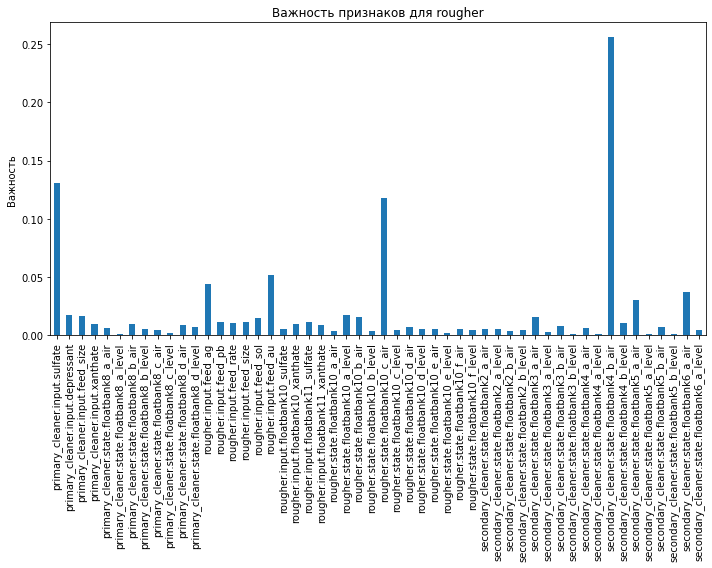

In [44]:
# feature_importances_rougher
series = pd.Series(grid_rougher_RF.best_estimator_._final_estimator.feature_importances_,
                   test.columns)

fig, ax = plt.subplots(figsize=(10,8))
series.plot.bar(ax=ax)
ax.set_title("Важность признаков для rougher")
ax.set_ylabel('Важность')
fig.tight_layout()

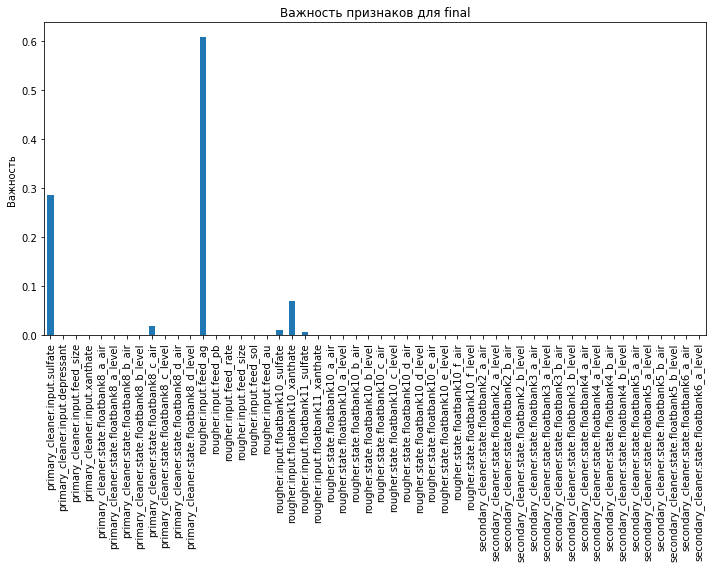

In [45]:
# feature_importances_final
series = pd.Series(grid_final_RF.best_estimator_._final_estimator.feature_importances_,
                   test.columns)

fig, ax = plt.subplots(figsize=(10,8))
series.plot.bar(ax=ax)
ax.set_title("Важность признаков для final")
ax.set_ylabel('Важность')
fig.tight_layout()

***
### 3.4 Сравнение с константной моделью

In [46]:
base = DummyRegressor(strategy="mean")
base_final = DummyRegressor(strategy="mean")

base.fit(train_features_dataset_rougher,train_target_dataset_rougher)
base_final.fit(train_features_dataset_final,train_target_dataset_final)

DummyRegressor()

In [47]:
base_rougher = base.predict(test)
base_final_pred = base_final.predict(test)

In [48]:
final_sMAPE(sMAPE(target_test_rougher, base_rougher), sMAPE(target_test_final, base_final_pred))

7.532382118751108

### Вывод

Ошибка на тесте приемлемая, так как она меньше чем на константном алгоритме.

***
## Общий вывод

* Итоговая модель построена на алгоритме `RandomForest`;
* Ошибка на тестовой выборке: `6.745065271495995`;
* Параметры алгоритма: { `max_depth=10, n_estimators=10` };
* Параметр `recovery` в тренировочной выборке был рассчитан верно;
* Изначально, в тестовой выборке отсутствует `34` признака.